In [20]:
%reload_ext autoreload
%autoreload 2
from itertools import chain
from os import listdir
from collections import defaultdict
from nonparametric_regression import NonParametricRegression
from preprocessing import bag_of_words
from sklearn.metrics import f1_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

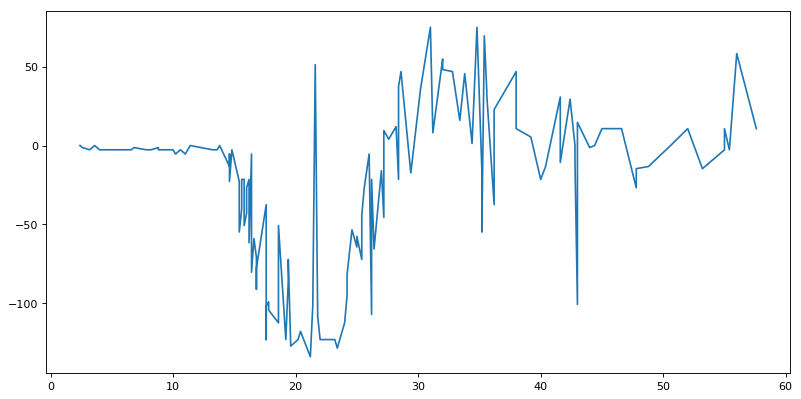

In [21]:
df = pd.read_csv('non-parametric.csv', sep=';')
x, y = df.x, df.y
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y)
plt.show()

In [22]:
reg = NonParametricRegression()

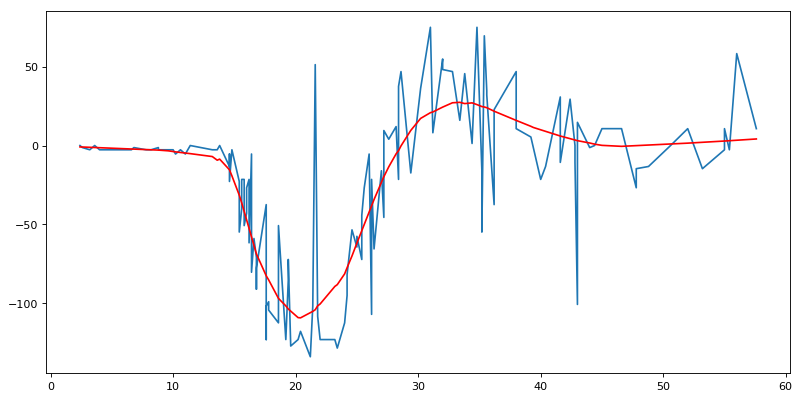

In [23]:
y_pred = reg.train(np.array(x), np.array(y))
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x, y, x, y_pred, 'r')
plt.show()